In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

### K-Nearest Neighbor algorithm

In [3]:
#knn from scratch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            k_nearest = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_nearest]
            y_pred.append(np.argmax(np.bincount(k_nearest_labels)))
        return np.array(y_pred)


## Logistic regression

In [4]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  # fit function to train the model with dataset
  def fit(self, X, Y):
    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape

    #initiating weight & bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()
      
  def update_weights(self):

    # Y_hat formula (sigmoid function)
    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    
    
    # derivaties
    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
    db = (1/self.m)*np.sum(Y_hat - self.Y)
    
    # updating the weights & bias using gradient descent
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db
  
  # Sigmoid Equation & Decision Boundary
  def predict(self, X):
    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred


In [5]:
#Read the datset 
data = pd.read_csv("lung cancer.csv")
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
data.shape

(309, 16)

In [7]:
data.head() 

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
#Describing the dataset:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
#Find the null values if there are any in null values.
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
"""if there are any null values in the dataset use the below code to fill them with some value 0
data.fillna(0,inplace=True) """

'if there are any null values in the dataset use the below code to fill them with some value 0\ndata.fillna(0,inplace=True) '

In [ ]:
from sklearn import linear_model, preprocessing
le = preprocessing.LabelEncoder()
#convert to numeric values
data['GENDER'] = le.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Heatmap

<AxesSubplot: >

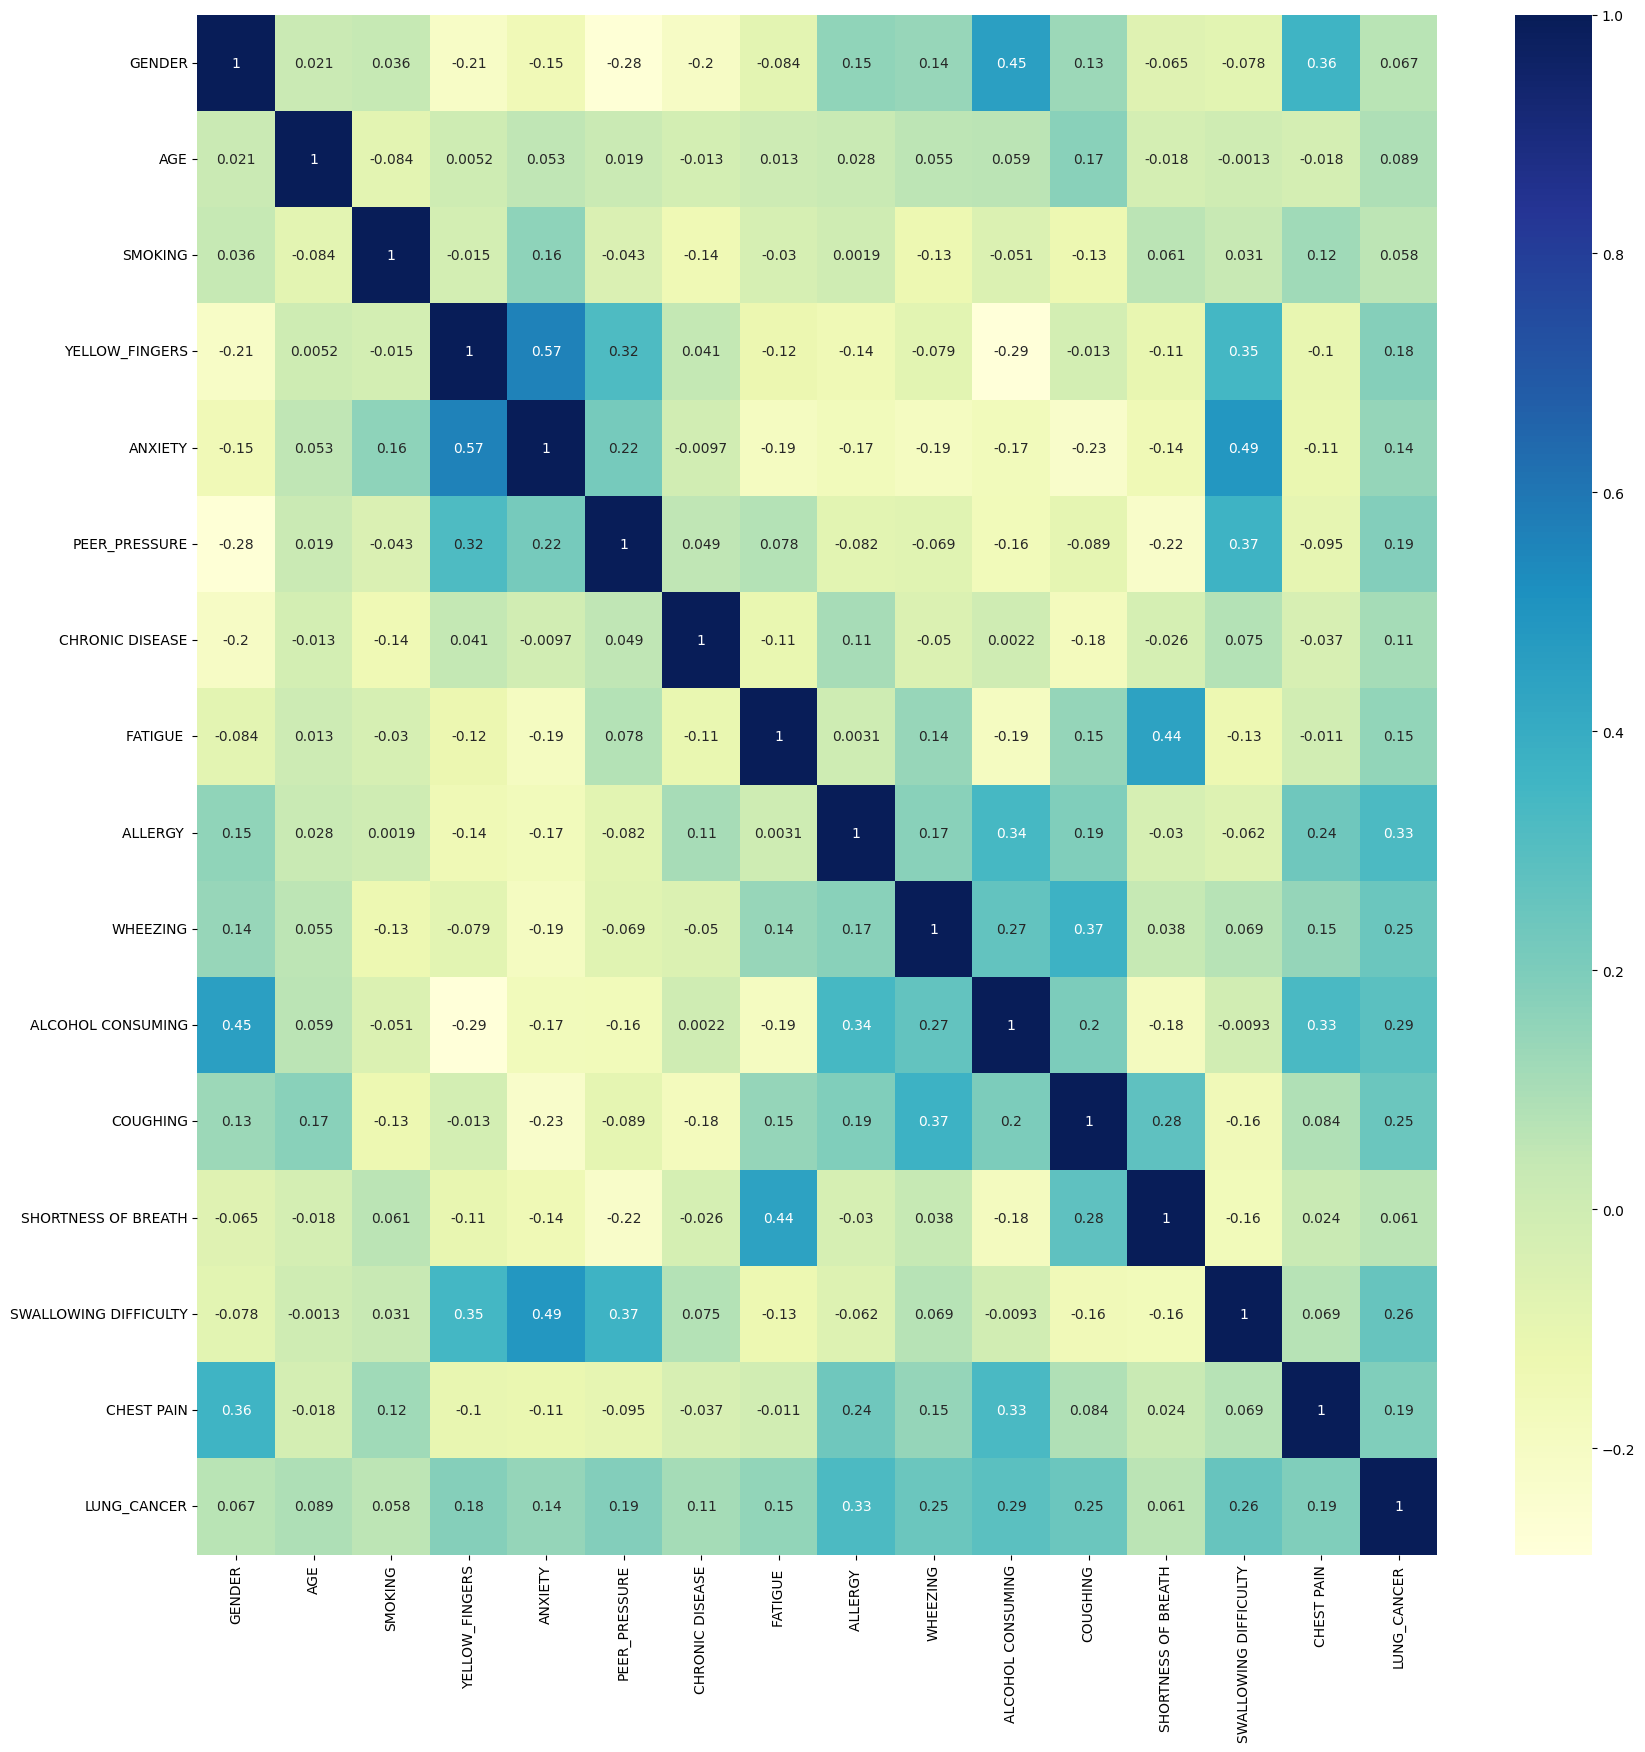

In [ ]:
data.corr()
Fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [ ]:
#split the data into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)


### KNN

In [ ]:
knn = KNN(k=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test,  y_pred)
print("Accuracy: ", accuracy)
print(accuracy_score(y_train,knn.predict(X_train)))
# generate the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
c=classification_report(y_test, y_pred)
print(c)


Accuracy:  0.8709677419354839
0.9190283400809717
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.93      0.93      0.93        54

    accuracy                           0.87        62
   macro avg       0.71      0.71      0.71        62
weighted avg       0.87      0.87      0.87        62



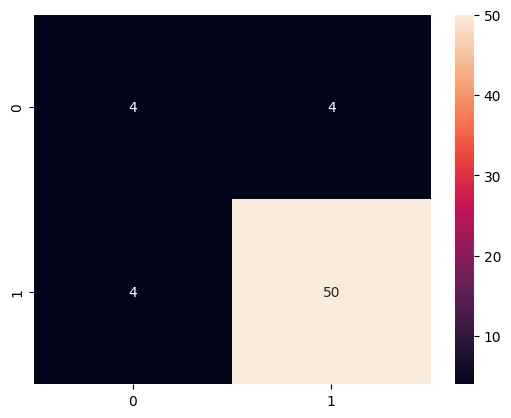

In [ ]:
sns.heatmap(cm, annot = True)
plt.show()

### LOGISTIC REGRESSION

In [ ]:
logreg = Logistic_Regression(learning_rate=0.1, no_of_iterations=1000)
# fit the model to the training data
logreg.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# print accuracy
print('accuracy_score')
print(accuracy_score(y_test,y_pred))

# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix",cm)

accuracy_score
0.967741935483871
Confusion Matrix [[ 1  1]
 [ 1 59]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score, recall_score

# inbuilt
clf = LogisticRegression()
clf.fit(X_train, y_train)
# make predictions on the test set
y_pred = clf.predict(X_test)

# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# calculate the F1-score
f1 = f1_score(y_test, y_pred, average='macro')
# calculate precision
precision = precision_score(y_test, y_pred, average='macro')
# calculate recall
recall = recall_score(y_test, y_pred, average='macro')

print("Confusion Matrix",cm)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix [[ 1  1]
 [ 1 59]]
F1-score: 0.7416666666666667
Precision: 0.7416666666666667
Recall: 0.7416666666666667


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


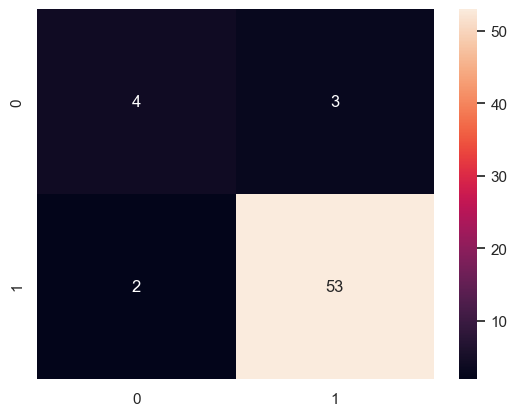

In [ ]:
sns.heatmap(cm, annot = True)
plt.show()